In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn import decomposition

In [ ]:
df_customer = pd.read_csv('data/olist_customers_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_orders_init = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')

In [ ]:
df_orders_init['purchase_date'] = pd.to_datetime(df_orders_init['order_purchase_timestamp'].str.split(' ',expand=True)[0])

# Clustering

In [4]:
# Chargement du dataset
df_rfm = pd.read_csv('df_rfm.csv')

In [5]:
# Création des input
X=df_rfm[['R','M','review_score','Delivery','purchased_items']]

In [144]:
# Standardisation
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [145]:
# Calcul du score silhouette pour plusieurs clustering
clusters = []
silhouette_score = []
for k in range(2,8):
    print(k)
    clusters.append(k)
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    silhouette_score.append(metrics.silhouette_score(X_scaled, kmeans.labels_))

2
3
4
5
6
7


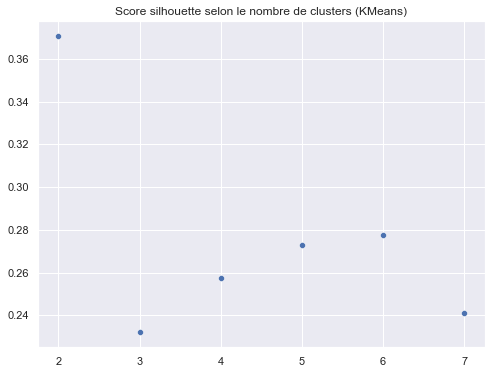

In [146]:
# Visualisation des scores
g=sns.scatterplot(x=clusters,y=silhouette_score)
g.set(title='Score silhouette selon le nombre de clusters (KMeans)');

In [6]:
# Définition de l'input sans la variable 'purchased items'
Xbis=df_rfm[['R','M','review_score','Delivery']]

In [7]:
# Standardisation
std_scale_bis = StandardScaler().fit(Xbis)
Xbis_scaled = std_scale_bis.transform(Xbis)

In [149]:
# Calcul des scores silhouettes pour clustering KMeans
clusters = []
silhouette_score = []
for k in range(2,8):
    print(k)
    clusters.append(k)
    kmeans = KMeans(n_clusters=k).fit(Xbis_scaled)
    silhouette_score.append(metrics.silhouette_score(Xbis_scaled, kmeans.labels_))

2
3
4
5
6
7


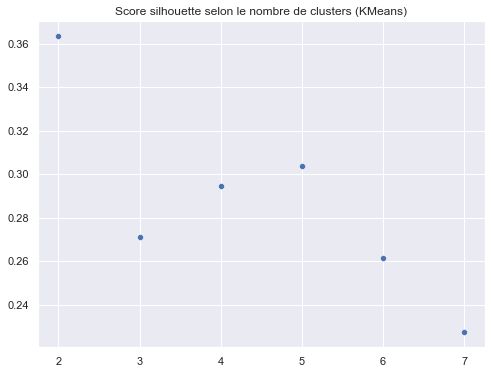

In [150]:
# Visualisation des scores silhouettes
g=sns.scatterplot(x=clusters,y=silhouette_score);
g.set(title='Score silhouette selon le nombre de clusters (KMeans)');

In [151]:
# Score silhouette du meilleur cas
kmeans = KMeans(n_clusters=5).fit(Xbis_scaled)
metrics.silhouette_score(Xbis_scaled, kmeans.labels_)

0.3007041714791907

In [152]:
# Calcul des scores silhouettes pour clustering hierarchique
k = np.random.choice(len(Xbis_scaled), int(round(len(Xbis_scaled)/5,0)), replace=False)
X_sampled = Xbis_scaled[k]
clusters = []
silhouette_score = []
for k in range(2,8):
    print(k)
    clusters.append(k)
    CAH = AgglomerativeClustering(n_clusters=k).fit(X_sampled)
    silhouette_score.append(metrics.silhouette_score(X_sampled, CAH.labels_))

2
3
4
5
6
7


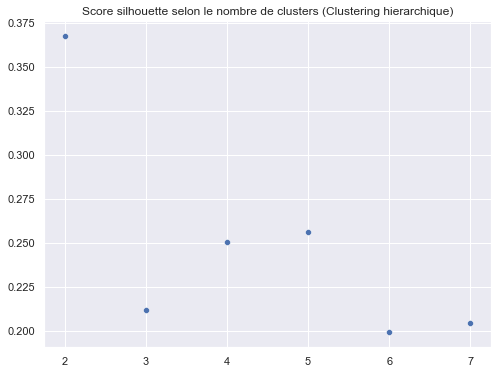

In [194]:
# Visualisation des scores silhouettes
g=sns.scatterplot(x=clusters,y=silhouette_score);
g.set(title='Score silhouette selon le nombre de clusters (Clustering hierarchique)');

In [154]:
# Projection par ACP pour visualisation des clusters
pca = decomposition.PCA(n_components=2)
pca.fit(Xbis_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
X_transformed_bis = pca.transform(Xbis_scaled)

[0.32640432 0.25369008]
0.580094405738155


For n_clusters = 3 The average silhouette_score is : 0.27125059998082485
For n_clusters = 4 The average silhouette_score is : 0.29476878930547074
For n_clusters = 5 The average silhouette_score is : 0.300741838757497


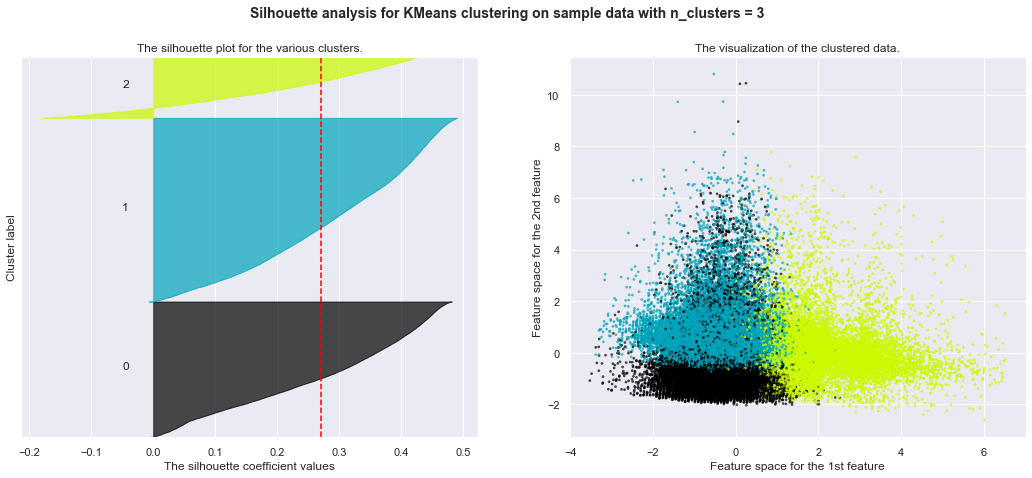

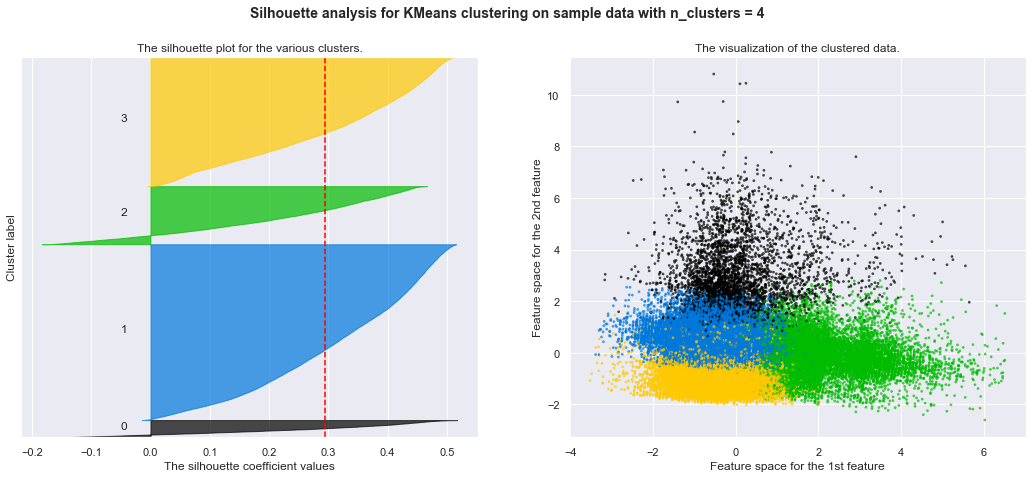

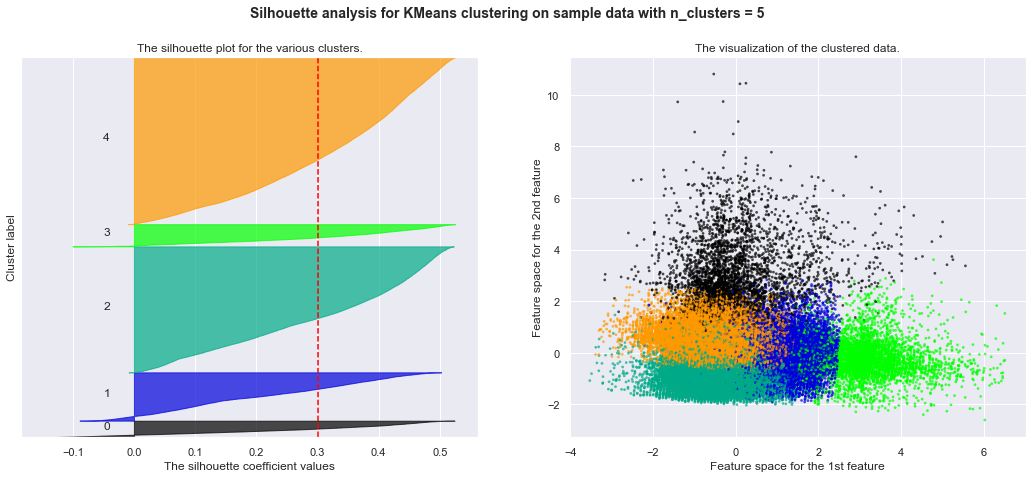

In [200]:
# Visualisation des clusters pour le meilleur cas
range_n_clusters = range(3,6)

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xbis_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(Xbis_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(Xbis_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(Xbis_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_transformed_bis[:, 0], X_transformed_bis[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

Test de paramètres pour le clustering par DBSCAN

In [204]:
k = np.random.choice(len(Xbis_scaled), int(round(len(Xbis_scaled)/5,0)), replace=False)
X_sampled = Xbis_scaled[k]
for e in np.linspace(0.4,0.5,11):
    for s in np.linspace(10,30,5):
        db = DBSCAN(eps = e, min_samples = s).fit(Xbis_scaled)
        score = metrics.silhouette_score(Xbis_scaled, db.labels_)
        c = len(np.unique(db.labels_))
        print(e, s, c, score)

0.4 10.0 12 0.18954422651476893
0.4 15.0 11 0.15965746063281192
0.4 20.0 4 0.2414937121324433
0.4 25.0 6 0.1852361011362809
0.4 30.0 5 0.13648913539394436
0.41000000000000003 10.0 8 0.22533257259684833
0.41000000000000003 15.0 9 0.2099252183507253
0.41000000000000003 20.0 4 0.3054618515562711
0.41000000000000003 25.0 4 0.3692758530234907
0.41000000000000003 30.0 5 0.21140063070685078
0.42000000000000004 10.0 9 0.1941379577739792
0.42000000000000004 15.0 8 0.15389051013312433
0.42000000000000004 20.0 4 0.30712654509542797
0.42000000000000004 25.0 5 0.365748852864193
0.42000000000000004 30.0 4 0.36902881859888725
0.43 10.0 10 0.2662253642142126
0.43 15.0 6 0.12925095768081715
0.43 20.0 5 0.21621745637664824
0.43 25.0 4 0.37107478011777845
0.43 30.0 4 0.36902124689926713
0.44 10.0 9 0.27048790860445776
0.44 15.0 6 0.16627345067663366
0.44 20.0 4 0.24191743099296428
0.44 25.0 2 0.46287068347660365
0.44 30.0 3 0.4279796852159343
0.45 10.0 14 0.266104043496442
0.45 15.0 7 0.16995544659128078

In [8]:
db0 = DBSCAN(eps = 0.5, min_samples = 15).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db0.labels_))
print(np.unique(db0.labels_, return_counts=True))

0.5290063908739451
(array([-1,  0,  1,  2], dtype=int64), array([ 2322, 83418,    75,    17], dtype=int64))


In [148]:
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db1.labels_))
print(np.unique(db1.labels_, return_counts=True))

0.273263182820254
(array([-1,  0,  1], dtype=int64), array([ 3811, 81965,    61], dtype=int64))


In [156]:
db2 = DBSCAN(eps = 0.39, min_samples = 30).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db2.labels_))
print(np.unique(db2.labels_, return_counts=True))

0.12032571814455979
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 6546, 64070,  6259,  7075,  1857,    30], dtype=int64))


In [157]:
db2 = DBSCAN(eps = 0., min_samples = 20).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db2.labels_))
print(np.unique(db2.labels_, return_counts=True))

0.18889216146075447
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 4788, 71417,  7467,  2122,    28,    15], dtype=int64))


In [160]:
db3 = DBSCAN(eps = 0.4, min_samples = 25).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.21655633732489346
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 5482,    71, 70926,  7320,  2013,    25], dtype=int64))


In [150]:
db3 = DBSCAN(eps = 0.385, min_samples = 23).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.07277181019991703
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 5307, 48636, 15975,  6509,  7472,  2121], dtype=int64))


In [153]:
db3 = DBSCAN(eps = 0.385
             , min_samples = 24).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.07227905743711169
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 5417, 48610, 15961,  6476,  7448,  2108], dtype=int64))


In [122]:
db3 = DBSCAN(eps = 0.415
             , min_samples = 100).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.07531679232189295
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([12262, 61743,  5765,  5446,   475,   146], dtype=int64))


In [123]:
db3 = DBSCAN(eps = 0.40
             , min_samples = 50).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.12619553986582963
(array([-1,  0,  1,  2,  3], dtype=int64), array([ 8453, 63388,  5979,  6570,  1447], dtype=int64))


In [128]:
db3 = DBSCAN(eps = 0.5
             , min_samples = 20).fit(Xbis_scaled)
print(metrics.silhouette_score(Xbis_scaled, db3.labels_))
print(np.unique(db3.labels_, return_counts=True))

0.3755002745569383
(array([-1,  0,  1,  2,  3], dtype=int64), array([ 2860, 82884,    49,    18,    26], dtype=int64))


## Etude du meilleur cluster

In [159]:
#Fit du meilleur clustering
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_labels = clusterer.fit_predict(Xbis_scaled)

In [160]:
#Score du meilleur clustering
metrics.silhouette_score(Xbis_scaled, cluster_labels)

0.300741838757497

In [161]:
#Dénombrement des individus dans chaque cluster
np.unique(cluster_labels, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([ 3720, 10884, 28362,  4994, 37691], dtype=int64))

In [162]:
# Etude statistique de ce cluster
df_stats = df_rfm[['R','M','review_score','Delivery']].reset_index()

In [163]:
df_stats['cluster'] = cluster_labels.tolist()
df_stats = df_stats.drop(columns='index')

In [164]:
df_stats.groupby(by='cluster').mean()

R           M  review_score   Delivery
cluster                                                 
0        210.977419  767.028234      4.177823 -13.179167
1        212.673741  138.969678      1.912325 -13.105889
2        366.762781  124.830344      4.643793 -12.925675
3        197.223068  150.320106      1.615238   9.917901
4        115.760898  125.367277      4.718030 -13.779430

In [165]:
# Définition des centroides
centers = pd.DataFrame(std_scale_bis.inverse_transform(clusterer.cluster_centers_),columns=['R','M','review_score','Delivery'])
centers['cluster']=[0,1,2,3,4]

In [166]:
centers

R           M  review_score   Delivery  cluster
0  210.890378  766.167853      4.177030 -13.175690        0
1  212.705812  138.880488      1.911601 -13.111505        1
2  366.698291  124.791240      4.643921 -12.923542        2
3  197.205082  150.244180      1.615946   9.907363        3
4  115.713880  125.331546      4.717895 -13.781170        4

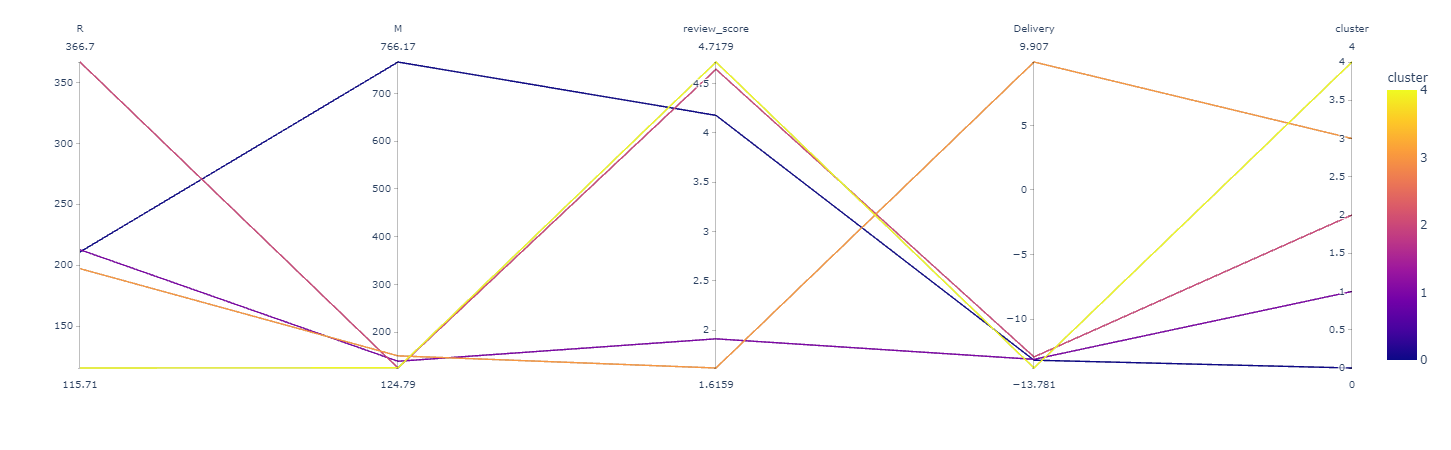

In [167]:
#Graphe parallel coordinates des centroides
import plotly.express as px
fig = px.parallel_coordinates(centers,color = 'cluster')
fig.show()

# Stabilité

In [168]:
df_orders_bis = df_orders_init[(df_orders_init['purchase_date']>datetime.datetime(2017,2,1))&(df_orders_init['purchase_date']<datetime.datetime(2018,9,1))]

In [169]:
df_orders_bis = df_orders_bis[df_orders_bis['order_status']=='delivered']
df_orders_bis['purchase_date'] = pd.to_datetime(df_orders_bis['purchase_date'])

In [170]:
df_orders_bis = df_orders_bis.merge(df_customer[['customer_id','customer_unique_id']], how='left',on='customer_id')
df_orders_bis['purchased_x_days_ago'] = abs(df_orders_bis['purchase_date']-df_orders_bis['purchase_date'].max()).dt.days
data = df_order_payments.groupby(by='order_id',as_index = False).sum()[['order_id','payment_value']]
df_orders_bis = df_orders_bis.merge(data, on='order_id', how='left')
df_orders_bis = df_orders_bis.merge(df_order_reviews[['order_id','review_score']].groupby(by='order_id', as_index=False).median(), on='order_id',how='left')
df_orders_bis['purchase_date'] = pd.to_datetime(df_orders_bis['order_purchase_timestamp'].str.split(' ',expand=True)[0])
df_orders_bis['delivered_date'] = pd.to_datetime(df_orders_bis['order_delivered_customer_date'].str.split(' ',expand=True)[0])
df_orders_bis['estimated_delivery_date'] = pd.to_datetime(df_orders_bis['order_estimated_delivery_date'].str.split(' ',expand=True)[0])
df_orders_bis['Delivery']=(df_orders_bis['delivered_date']-df_orders_bis['estimated_delivery_date']).dt.days
df_orders_bis=df_orders_bis[df_orders_bis['payment_value']<2000]
df_orders_bis=df_orders_bis[df_orders_bis['Delivery']<50]
df_orders_bis=df_orders_bis[df_orders_bis['Delivery']>-50]

Création de la base initiale B0

In [171]:
b0_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,1,1)]

In [172]:
b0 = df_orders_bis[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()

In [173]:
data = b0_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b0 = b0.merge(data, on='customer_unique_id', how='left')

In [174]:
data = b0_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b0 = b0.merge(data, on='customer_unique_id', how='left')

In [175]:
data = b0_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b0 = b0.merge(data, on='customer_unique_id', how='left')

In [176]:
b0 = b0.dropna()

In [177]:
b0_data = b0[['payment_value','review_score','purchased_x_days_ago','Delivery']]

In [178]:
std_scale = StandardScaler().fit(b0_data)
b0_scaled = std_scale.transform(b0_data)

In [179]:
# Entrainement d'un clustering sur cette base
c0 = KMeans(n_clusters=5).fit(b0_scaled)

Création des bases suivantes 

In [180]:
b1_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,2,1)]
b2_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,3,1)]
b3_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,4,1)]
b4_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,5,1)]
b5_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,6,1)]
b6_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,7,1)]
b7_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,8,1)]
b8_orders = df_orders_bis[df_orders_bis['purchase_date']<datetime.datetime(2018,9,1)]

In [181]:
b1 = b1_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b2 = b2_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b3 = b3_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b4 = b4_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b5 = b5_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b6 = b6_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b7 = b7_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()
b8 = b8_orders[['customer_unique_id','payment_value']].groupby('customer_unique_id', as_index=False).sum()

In [182]:
data = b1_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b1 = b1.merge(data, on='customer_unique_id', how='left')
data = b2_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b2 = b2.merge(data, on='customer_unique_id', how='left')
data = b3_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b3 = b3.merge(data, on='customer_unique_id', how='left')
data = b4_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b4 = b4.merge(data, on='customer_unique_id', how='left')
data = b5_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b5 = b5.merge(data, on='customer_unique_id', how='left')
data = b6_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b6 = b6.merge(data, on='customer_unique_id', how='left')
data = b7_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b7 = b7.merge(data, on='customer_unique_id', how='left')
data = b8_orders[['customer_unique_id','review_score']].groupby(by='customer_unique_id',as_index=False).median()
b8 = b8.merge(data, on='customer_unique_id', how='left')

In [183]:
data = b1_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b1 = b1.merge(data, on='customer_unique_id', how='left')
data = b2_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b2 = b2.merge(data, on='customer_unique_id', how='left')
data = b3_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b3 = b3.merge(data, on='customer_unique_id', how='left')
data = b4_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b4 = b4.merge(data, on='customer_unique_id', how='left')
data = b5_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b5 = b5.merge(data, on='customer_unique_id', how='left')
data = b6_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b6 = b6.merge(data, on='customer_unique_id', how='left')
data = b7_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b7 = b7.merge(data, on='customer_unique_id', how='left')
data = b8_orders[['customer_unique_id','purchased_x_days_ago']].groupby(by='customer_unique_id',as_index=False).min()
b8 = b8.merge(data, on='customer_unique_id', how='left')

In [184]:
data = b1_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b1 = b1.merge(data, on='customer_unique_id', how='left')
data = b2_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b2 = b2.merge(data, on='customer_unique_id', how='left')
data = b3_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b3 = b3.merge(data, on='customer_unique_id', how='left')
data = b4_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b4 = b4.merge(data, on='customer_unique_id', how='left')
data = b5_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b5 = b5.merge(data, on='customer_unique_id', how='left')
data = b6_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b6 = b6.merge(data, on='customer_unique_id', how='left')
data = b7_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b7 = b7.merge(data, on='customer_unique_id', how='left')
data = b8_orders[['customer_unique_id','Delivery']].groupby(by='customer_unique_id',as_index=False).median()
b8 = b8.merge(data, on='customer_unique_id', how='left')

In [185]:
b1 = b1.dropna()
b2 = b2.dropna()
b3 = b3.dropna()
b4 = b4.dropna()
b5 = b5.dropna()
b6 = b6.dropna()
b7 = b7.dropna()
b8 = b8.dropna()

In [186]:
b1_data = b1[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b2_data = b2[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b3_data = b3[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b4_data = b4[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b5_data = b5[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b6_data = b6[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b7_data = b7[['payment_value','review_score','purchased_x_days_ago','Delivery']]
b8_data = b8[['payment_value','review_score','purchased_x_days_ago','Delivery']]

In [187]:
std_scale = StandardScaler().fit(b1_data)
b1_scaled = std_scale.transform(b1_data)
std_scale = StandardScaler().fit(b2_data)
b2_scaled = std_scale.transform(b2_data)
std_scale = StandardScaler().fit(b3_data)
b3_scaled = std_scale.transform(b3_data)
std_scale = StandardScaler().fit(b4_data)
b4_scaled = std_scale.transform(b4_data)
std_scale = StandardScaler().fit(b5_data)
b5_scaled = std_scale.transform(b5_data)
std_scale = StandardScaler().fit(b6_data)
b6_scaled = std_scale.transform(b6_data)
std_scale = StandardScaler().fit(b7_data)
b7_scaled = std_scale.transform(b7_data)
std_scale = StandardScaler().fit(b8_data)
b8_scaled = std_scale.transform(b8_data)

In [188]:
#Entrainement des clusters sur les bases 1 à 8
c1 = KMeans(n_clusters=5).fit(b1_scaled)
c2 = KMeans(n_clusters=5).fit(b2_scaled)
c3 = KMeans(n_clusters=5).fit(b3_scaled)
c4 = KMeans(n_clusters=5).fit(b4_scaled)
c5 = KMeans(n_clusters=5).fit(b5_scaled)
c6 = KMeans(n_clusters=5).fit(b6_scaled)
c7 = KMeans(n_clusters=5).fit(b7_scaled)
c8 = KMeans(n_clusters=5).fit(b8_scaled)

Prediction grace aux clusters entrainés

In [189]:
b0_c0 = c0.predict(b0_scaled)
b1_c0 = c0.predict(b1_scaled)
b2_c0 = c0.predict(b2_scaled)
b3_c0 = c0.predict(b3_scaled)
b4_c0 = c0.predict(b4_scaled)
b5_c0 = c0.predict(b5_scaled)
b6_c0 = c0.predict(b6_scaled)
b7_c0 = c0.predict(b7_scaled)
b8_c0 = c0.predict(b8_scaled)

In [190]:
b1_c1 = c1.predict(b1_scaled)
b2_c2 = c2.predict(b2_scaled)
b3_c3 = c3.predict(b3_scaled)
b4_c4 = c4.predict(b4_scaled)
b5_c5 = c5.predict(b5_scaled)
b6_c6 = c6.predict(b6_scaled)
b7_c7 = c7.predict(b7_scaled)
b8_c8 = c8.predict(b8_scaled)

Calcul des scores de Rand

In [191]:
from sklearn.metrics.cluster import adjusted_rand_score

In [192]:
a0 = adjusted_rand_score(b0_c0, b0_c0)
a1 = adjusted_rand_score(b1_c0, b1_c1)
a2 = adjusted_rand_score(b2_c0, b2_c2)
a3 = adjusted_rand_score(b3_c0, b3_c3)
a4 = adjusted_rand_score(b4_c0, b4_c4)
a5 = adjusted_rand_score(b5_c0, b5_c5)
a6 = adjusted_rand_score(b6_c0, b6_c6)
a7 = adjusted_rand_score(b7_c0, b7_c7)
a8 = adjusted_rand_score(b8_c0, b8_c8)

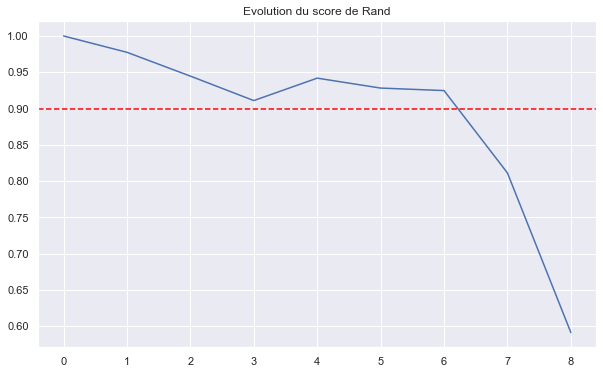

In [203]:
# Evolution du score de Rand
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(x=range(0,9), y =[a0,a1,a2,a3,a4,a5,a6, a7, a8]);
ax.axhline(0.9, c = 'red', ls='--');
ax.set(title='Evolution du score de Rand');